<a href="https://colab.research.google.com/github/elsaessb/MLUebungen/blob/main/Blatt1Aufgabe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aufgabe 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',
        'LSTAT','TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, 
                     index_col=False)

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. Gegeben eine Menge von $n$ $d$-dimensionalen Datenpunkten $\mathbf{x}_i$, berechnen Sie zuerst deren Mittelwert $\boldsymbol{\mu}_x = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i$ für jedes einzelne Merkmal und ziehen ihn von allen Datenpunkten ab (Zentrierung).
2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt ist optional, aber meist vorteilhaft.
3. Kopieren Sie alle $\mathbf{x}_i$ als Reihen in eine $n \times d$-Matrix $X$, die sog. Daten- oder Designmatrix.
4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von $X$ (z.B. mit `numpy.linalg.svd()`): $$ X = UDV^\top $$
Wer nicht weiß, was eine Singuärwertzerlegung ist oder macht, der lese bitte in den entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit `numpy.linalg.eig()`), diese Methode ist aber meist aufwändiger und numerisch weniger stabil.
5. Die ersten $r$ Basisvektoren $\mathbf{q}_i$  (d.h die ersten $r$ Hauptkomponenten) sind die ersten $r$ Spalten der orthogonalen $d \times d$-Matrix $V$.
6. Die Projektionen $a_i$ der Daten $\mathbf{x}_i$ auf die ersten $r$ Basisvektoren $\mathbf{q}_i$ (d.h die neuen Variablenwerte im neuen Koordinatensystem) sind die die ersten $r$ Spalten der $n \times d$-Matrix $UD$.
7. Die Standardabweichungen entlang der Hauptkomponenten $\mathbf{q}_i$ sind die Diagonalelemente der Diagonalmatrix $D$ geteilt durch $\sqrt{n - 1}$.

a)  Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.


In [4]:
def PCA(data):
  print("Original Data")
  print(data)

  #mittelwert berechnen und abziehen (Zentrieren)
  for col in data.columns:
    col_mean = data[col].mean()
    data[col] = data[col] - col_mean

  print("Centered Data")
  print(data)

  #Normieren (durch std.abweichung teilen)
  for col in data.columns:
    col_std = data[col].std()
    data[col] = data[col] / col_std

  print(data.var())
  print("Normalized Data")
  print(data)
  
  #Daten in eine Designmatrix kopieren
  design = data.to_numpy()
  print("Design Matrix - Achtung Genauigkeit erhöht")
  print(design)
  print(design.shape)

  #Singulärwertzerlegung bestimmen
  u, s, vh = np.linalg.svd(design)
  print("U:")
  print(u)
  print("S:")
  print(s)
  print("VH:")
  print(vh)
  return (u, s, vh)

  




In [9]:
u, s, vh = PCA(boston.loc[:,:"LSTAT"])

x_tmp = boston.loc[:,:"LSTAT"]
x = x_tmp.to_numpy()
print("XXT")
print(pd.DataFrame(np.matmul(x.T,x)))

df = pd.DataFrame()

#Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der 
#Kovarianzmatrix (Achtung: die Diagonalelemente von D müssen dafür quadriert 
#und durch n − 1 geteilt werden. Warum?)
s = s**2/(506-1)
df["Eigenwerte der Kovarianzmatrix??"] = s

#dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz 
#(“erklärte Varianz”)
decl_var = []
for element in s:
  decl_var.append(element/s.sum())
np_decl = np.asarray(decl_var)
df["erklärte Varianz"] = np_decl
print("summe erklärte Varianz:")
print(np_decl.sum())

np_sum = np_decl.cumsum()
df["kum. erkl. Varianz"] = np_sum


df

Original Data
        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
C

,Eigenwerte der Kovarianzmatrix??,erklärte Varianz,kum. erkl. Varianz
0,6.126849,0.471296,0.471296
1,1.433275,0.110252,0.581548
2,1.242617,0.095586,0.677134
3,0.857575,0.065967,0.743101
4,0.834816,0.064217,0.807318
5,0.657407,0.050570,0.857888
6,0.535356,0.041181,0.899069
7,0.396097,0.030469,0.929538
8,0.276943,0.021303,0.950841
9,0.220238,0.016941,0.967783


c) Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

In [12]:
new_df = pd.DataFrame(np.corrcoef(vh)) # aus welchem Array wird der Korrelationskoeffizient gebildet (Es macht mMn nur vh btw eine Matrix mit 13 Spalten Sinn??)
new_df
#Dieses Array ist unkorreliert, so wie es sein sollte?

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.048584,-0.139443,0.188684,0.069678,0.205140,0.022127,-0.228911,-0.052607,-0.081135,0.091669,0.130660,0.010789
1,0.048584,1.000000,0.034425,-0.046581,-0.017202,-0.050643,-0.005462,0.056512,0.012987,0.020030,-0.022630,-0.032256,-0.002664
2,-0.139443,0.034425,1.000000,0.133694,0.049371,0.145354,0.015678,-0.162197,-0.037275,-0.057489,0.064953,0.092580,0.007645
3,0.188684,-0.046581,0.133694,1.000000,-0.066805,-0.196683,-0.021214,0.219473,0.050438,0.077790,-0.087889,-0.125273,-0.010344
4,0.069678,-0.017202,0.049371,-0.066805,1.000000,-0.072632,-0.007834,0.081048,0.018626,0.028727,-0.032456,-0.046262,-0.003820
5,0.205140,-0.050643,0.145354,-0.196683,-0.072632,1.000000,-0.023065,0.238615,0.054837,0.084574,-0.095555,-0.136199,-0.011246
6,0.022127,-0.005462,0.015678,-0.021214,-0.007834,-0.023065,1.000000,0.025737,0.005915,0.009122,-0.010307,-0.014691,-0.001213
7,-0.228911,0.056512,-0.162197,0.219473,0.081048,0.238615,0.025737,1.000000,-0.061191,-0.094374,0.106627,0.151981,0.012550
8,-0.052607,0.012987,-0.037275,0.050438,0.018626,0.054837,0.005915,-0.061191,1.000000,-0.021689,0.024504,0.034927,0.002884
9,-0.081135,0.020030,-0.057489,0.077790,0.028727,0.084574,0.009122,-0.094374,-0.021689,1.000000,0.037793,0.053868,0.004448


d) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

In [56]:
D = np.diag(s)
DD = np.zeros((506-13, 13))

print(D.shape)
print(DD.shape)

D_fin = np.vstack((D,DD))
print(D_fin.shape)
print(u.shape)

ud_cat = np.matmul(u,D_fin)[:, :3]

print(ud_cat)

ud_df =pd.DataFrame(np.corrcoef(np.hstack((x,ud_cat)).T))
ud_df


(13, 13)
(493, 13)
(506, 13)
(506, 506)
[[-0.2308928   0.04114645  0.01699476]
 [-0.16035329  0.03150652 -0.03445107]
 [-0.2282849   0.03191389  0.00828182]
 ...
 [-0.03437157  0.06148429 -0.02024833]
 [-0.02976742  0.05542313 -0.02901257]
 [-0.01384315  0.04055384 -0.06416874]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,6.211667e-01,-3.774185e-01,2.748544e-01
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-6.344419e-01,-3.870685e-01,3.298007e-01
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,8.580991e-01,1.346759e-01,-1.777535e-02
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,1.248127e-02,5.445190e-01,3.230265e-01
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,8.486442e-01,2.623239e-01,1.348420e-01
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-4.684221e-01,1.787789e-01,6.621047e-01
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,7.764123e-01,3.734981e-01,-1.970259e-02
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-7.959006e-01,-4.179048e-01,-5.544237e-02
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,7.915662e-01,-3.250634e-01,3.202108e-01
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,8.377948e-01,-2.866726e-01,2.460699e-01




e) Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?


(13, 13)
(493, 13)
(506, 13)
(506, 506)
[[-2.30892795e-01  4.11464488e-02  1.69947557e-02 ... -6.32727506e-04
  -3.55597320e-04  4.10010594e-03]
 [-1.60353294e-01  3.15065157e-02 -3.44510656e-02 ... -1.22864708e-02
   2.30106420e-03 -7.92286781e-04]
 [-2.28284901e-01  3.19138856e-02  8.28182228e-03 ... -9.34809538e-03
  -2.43878561e-03 -1.57089441e-04]
 ...
 [-3.43715719e-02  6.14842900e-02 -2.02483262e-02 ...  2.21751937e-03
  -5.15763740e-03  6.99905920e-04]
 [-2.97674206e-02  5.54231333e-02 -2.90125669e-02 ...  1.66831915e-03
  -5.51865859e-03  6.09118607e-04]
 [-1.38431545e-02  4.05538400e-02 -6.41687419e-02 ...  3.53405112e-03
  -4.25711465e-03  2.20801338e-04]]
(506,)
(506, 13)


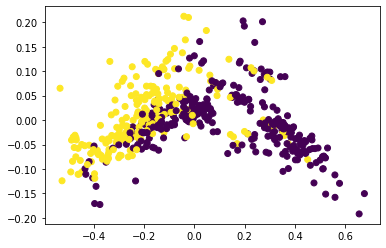

In [86]:
D = np.diag(s)
DD = np.zeros((506-13, 13))

print(D.shape)
print(DD.shape)

D_fin = np.vstack((D,DD))
print(D_fin.shape)
print(u.shape)

ud_cat = np.matmul(u,D_fin)

print(ud_cat)
col_bool = boston["TGT"] > boston["TGT"].mean()
print(col_bool.to_numpy().shape)
print(ud_cat.shape)
ud_cat = np.column_stack((ud_cat, col_bool.to_numpy()))

plt.scatter(ud_cat[:,0], ud_cat[:,1], c=ud_cat[:,13])